### https://pylops.readthedocs.io/en/stable/tutorials/solvers.html

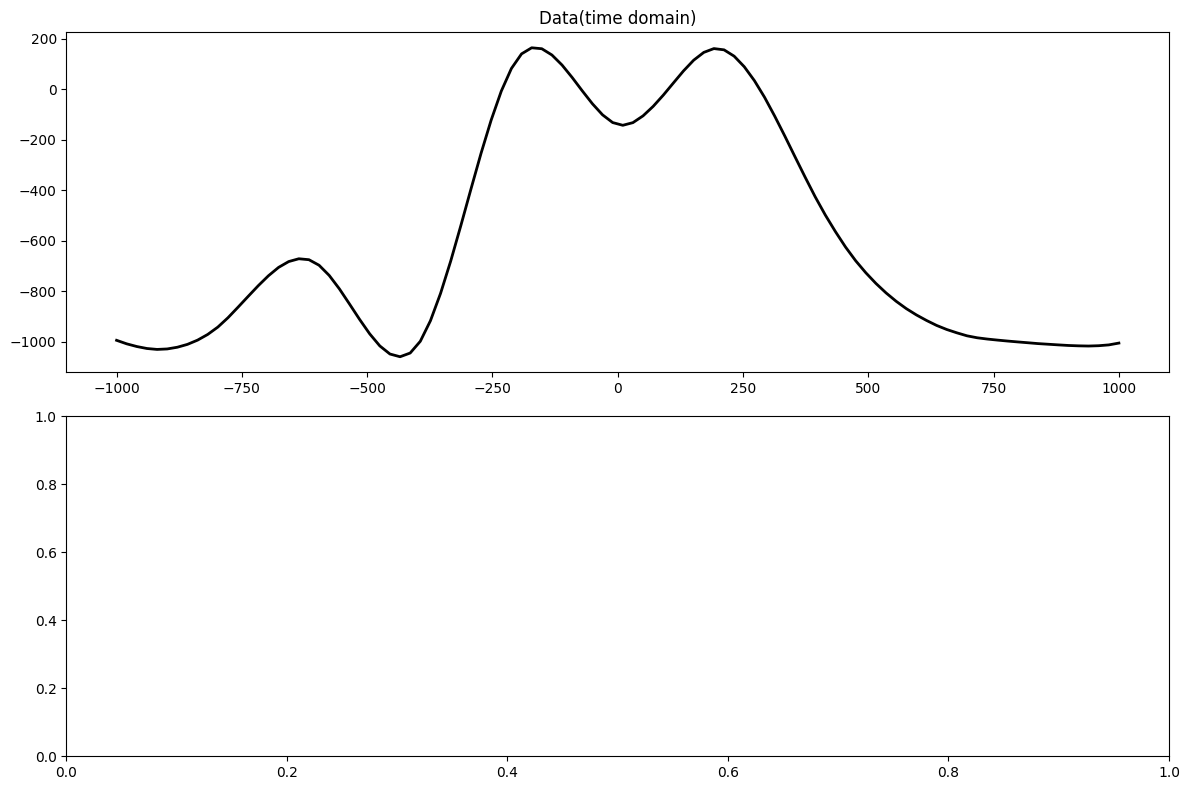

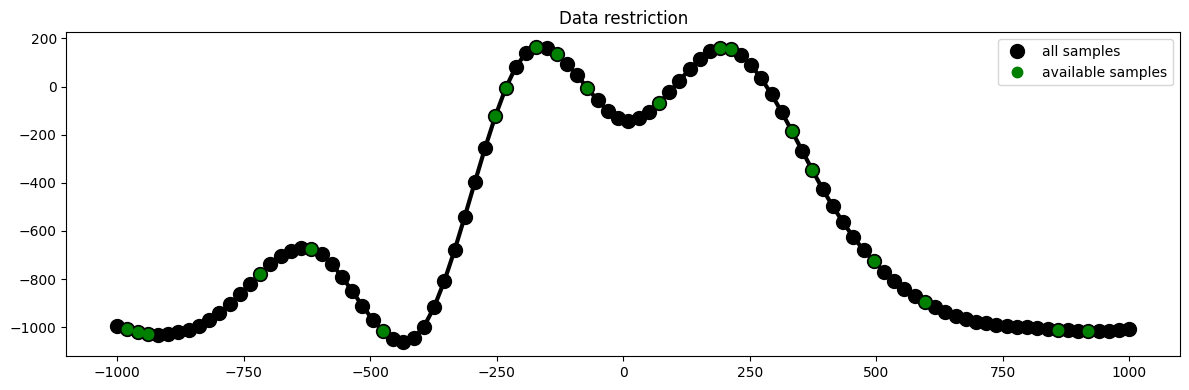

In [ ]:
import pylops

plt.close("all")
np.random.seed(10)

t= X
x = samples[2]
N = len(t)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(t, x, "k", lw=2)
axs[0].set_title("Data(time domain)")
axs[0].axis("tight")
plt.tight_layout()

# subsampling locations
perc_subsampling = 0.2
Nsub = int(np.round(N * perc_subsampling))

iava = np.sort(np.random.permutation(np.arange(N))[:Nsub])

# Create restriction operator
Rop = pylops.Restriction(N, iava, dtype="float64")

y = Rop * x
ymask = Rop.mask(x)

# Visualize data
fig = plt.figure(figsize=(12, 4))
plt.plot(t, x, "k", lw=3)
plt.plot(t, x, ".k", ms=20, label="all samples")
plt.plot(t, ymask, ".g", ms=15, label="available samples")
plt.legend()
plt.title("Data restriction")
plt.tight_layout()

In [ ]:
# Create regularization operator
D2op = pylops.SecondDerivative(N, dtype="float64")

# Regularized inversion
epsR = np.sqrt(0.1)
epsI = np.sqrt(1e-4)

xne = pylops.optimization.leastsquares.normal_equations_inversion(
    Rop, y, [D2op], epsI=epsI, epsRs=[epsR], **dict(maxiter=50)
)[0]

In [ ]:
ND2op = pylops.MatrixMult((D2op.H * D2op).tosparse())  # mimic fast D^T D

xne1 = pylops.optimization.leastsquares.normal_equations_inversion(
    Rop, y, [], NRegs=[ND2op], epsI=epsI, epsNRs=[epsR], **dict(maxiter=50)
)[0]

In [ ]:
xreg = pylops.optimization.leastsquares.regularized_inversion(
    Rop,
    y,
    [D2op],
    epsRs=[np.sqrt(0.1)],
    **dict(damp=np.sqrt(1e-4), iter_lim=50, show=0)
)[0]

In [ ]:
# Create regularization operator
Sop = pylops.Smoothing1D(nsmooth=11, dims=[N], dtype="float64")

# Invert for interpolated signal
xprec = pylops.optimization.leastsquares.preconditioned_inversion(
    Rop, y, Sop, **dict(damp=np.sqrt(1e-9), iter_lim=20, show=0)
)[0]

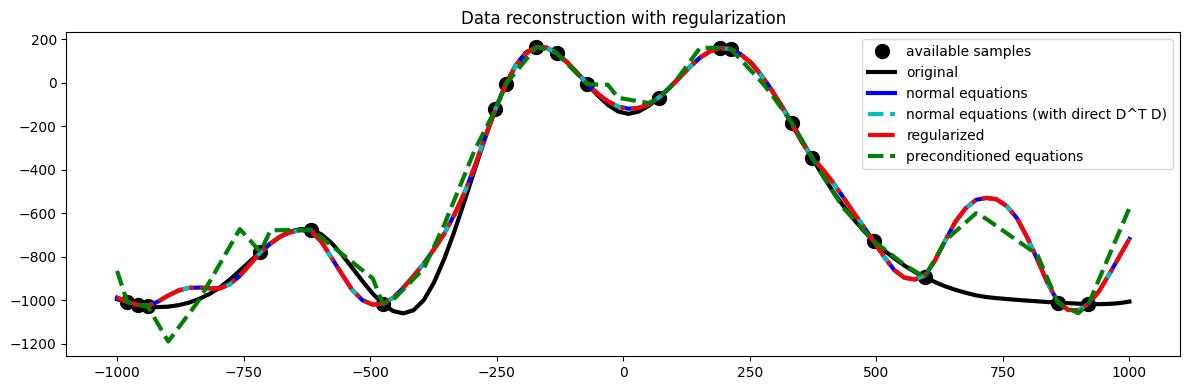

In [ ]:
# sphinx_gallery_thumbnail_number=4
fig = plt.figure(figsize=(12, 4))
plt.plot(t[iava], y, ".k", ms=20, label="available samples")
plt.plot(t, x, "k", lw=3, label="original")
plt.plot(t, xne, "b", lw=3, label="normal equations")
plt.plot(t, xne1, "--c", lw=3, label="normal equations (with direct D^T D)")
plt.plot(t, xreg, "-.r", lw=3, label="regularized")
plt.plot(t, xprec, "--g", lw=3, label="preconditioned equations")
plt.legend()
plt.title("Data reconstruction with regularization")

#subax = fig.add_axes([0.7, 0.2, 0.15, 0.6])
#subax.plot(t[iava], y, ".k", ms=20)
#subax.plot(t, x, "k", lw=3)
#subax.plot(t, xne, "b", lw=3)
#subax.plot(t, xne1, "--c", lw=3)
#subax.plot(t, xreg, "-.r", lw=3)
#subax.plot(t, xprec, "--g", lw=3)
#subax.set_xlim(0.05, 0.3)
plt.tight_layout()